<a href="https://colab.research.google.com/github/Nithilan98/DataScience_Task_7/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [ ]:
data=pd.read_csv('Social_Network_Ads.csv')
data=data.drop('User ID',axis=1)
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
x=data[['Gender','Age','EstimatedSalary']]
y=data[['Purchased']]
data.head()

**Splitting the dataset into the Training set and Test set**

In [15]:
X_Train,X_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.25,random_state=1)

**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Train=sc.fit_transform(X_Train)
X_Test=sc.transform(X_Test)

**Fitting Random Forest to the Training set**

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_Train,y_Train,sample_weight=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

**Predicting the Test set results**

In [18]:
y_pred=model.predict(X_Test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

**Making the Confusion Matrix**

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,plot_roc_curve
print(confusion_matrix(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(f1_score(y_Test,y_pred))


[[49  9]
 [ 4 38]]
0.87
0.853932584269663


**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


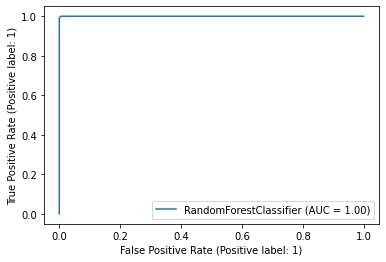

In [20]:
plot_roc_curve(model,X_Train,y_Train)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


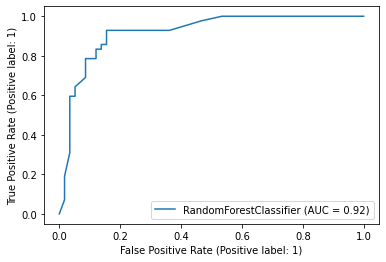

In [21]:
plot_roc_curve(model,X_Test,y_Test)